In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction, \
    combine_p_and_s_predictions

# Load in selected features data/results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
feature_dir = 'all_features_constHP'
s_results_df = pd.read_csv(os.path.join(datadir, 's_models', feature_dir, 'all.stat.results.csv'))
p_results_df = pd.read_csv(os.path.join(datadir, 'p_models', feature_dir, 'all.stat.results.csv'))
p_df_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.20230101.csv'))
s_df_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.20230101.csv'))



In [3]:
all_p_stats = p_results_df['station']
p_pred_path = os.path.join(datadir,'p_models', feature_dir)
p_train_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'train')
p_test_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'test')
p_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.815402,YHB
1,60001352,2.250510,2.176471,YHB
2,60001367,2.155231,2.114793,YHB
3,60001392,2.076413,1.538238,YHB
4,60001397,2.273901,2.024597,YHB
...,...,...,...,...
588,60456897,2.121661,2.239057,YDD
589,60456907,3.098341,3.135168,YDD
590,60470442,1.697778,1.279674,YDD
591,60513762,1.051296,0.951412,YDD


In [4]:
p_holdout_preds_df = combine_prediction_files(p_df_2022['station'].unique(), p_pred_path,'P', 'holdout')
p_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.275121,YHH
1,60529052,1.338398,1.129345,YHH
2,60529182,2.608960,2.277124,YHH
3,60529562,0.843194,0.864143,YHH
4,60529752,1.289612,1.304101,YHH
...,...,...,...,...
14,60554577,1.558406,1.776271,FLWY
15,60556087,1.402305,1.312838,FLWY
16,60556132,1.403297,1.743501,FLWY
17,60556617,1.858090,1.730688,FLWY


In [5]:
all_s_stats = s_results_df['station']
s_pred_path = os.path.join(datadir,'s_models', feature_dir)
s_train_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'train')
s_test_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'test')
s_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.721248,YHB
1,60001367,2.155231,2.053391,YHB
2,60001437,2.543478,2.466682,YHB
3,60001517,2.080642,2.054358,YHB
4,60001572,1.630087,1.529671,YHB
...,...,...,...,...
239,60516997,0.857505,0.957334,YDD
240,60518152,0.756163,1.071936,YDD
241,60519152,1.920408,1.743378,YDD
242,60521912,0.755231,0.995555,YDD


In [6]:
s_holdout_preds_df = combine_prediction_files(s_df_2022['station'].unique(), s_pred_path,'S', 'holdout')
s_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.315287,YMC
1,60529052,1.338398,1.141269,YMC
2,60529562,0.843194,0.724396,YMC
3,60529752,1.289612,1.158686,YMC
4,60529762,0.986834,1.052381,YMC
...,...,...,...,...
7,60553712,1.861026,2.086630,FLWY
8,60553732,2.405604,2.611246,FLWY
9,60554092,1.788850,2.120043,FLWY
10,60554577,1.558406,1.913964,FLWY


In [7]:
p_test_avg_df = compute_network_avg_prediction(p_test_preds_df)
p_holdout_avg_df = compute_network_avg_prediction(p_holdout_preds_df)

In [8]:
s_test_avg_df = compute_network_avg_prediction(s_test_preds_df)
s_holdout_avg_df = compute_network_avg_prediction(s_holdout_preds_df)

In [9]:
combined_test_df = combine_p_and_s_predictions(p_test_preds_df, s_test_preds_df)
combined_test_avg_df = compute_network_avg_prediction(combined_test_df)

Original number of predictions: 19858
Filtered number of predictions: 17859


In [10]:
combined_holdout_df = combine_p_and_s_predictions(p_holdout_preds_df, s_holdout_preds_df)
combined_holdout_avg_df = compute_network_avg_prediction(combined_holdout_df)

Original number of predictions: 7046
Filtered number of predictions: 6250


In [11]:
p_test_subset_avg = compute_network_avg_prediction(combined_test_df[combined_test_df['phase']=='P'])
p_holdout_subset_avg = compute_network_avg_prediction(combined_holdout_df[combined_holdout_df['phase']=='P'])

In [12]:
s_test_subset_avg = compute_network_avg_prediction(combined_test_df[combined_test_df['phase']=='S'])
s_holdout_subset_avg = compute_network_avg_prediction(combined_holdout_df[combined_holdout_df['phase']=='S'])

# Load in all features results

In [13]:
feature_dir = 'all_features'
s_results_allfeat_df = pd.read_csv(os.path.join(datadir, 's_models', feature_dir, 'all.stat.results.csv'))
p_results_allfeat_df = pd.read_csv(os.path.join(datadir, 'p_models', feature_dir, 'all.stat.results.csv'))

all_p_allfeat_stats = p_results_allfeat_df['station']
p_pred_allfeat_path = os.path.join(datadir,'p_models', feature_dir)
p_train_allfeat_preds_df = combine_prediction_files(all_p_allfeat_stats, p_pred_allfeat_path,'P', 'train')
p_test_allfeat_preds_df = combine_prediction_files(all_p_allfeat_stats, p_pred_allfeat_path,'P', 'test')
p_holdout_allfeat_preds_df = combine_prediction_files(p_df_2022['station'].unique(), p_pred_allfeat_path,'P', 'holdout')

all_s_allfeat_stats = s_results_allfeat_df['station']
s_pred_allfeat_path = os.path.join(datadir,'s_models', feature_dir)
s_train_allfeat_preds_df = combine_prediction_files(all_s_allfeat_stats, s_pred_allfeat_path,'S', 'train')
s_test_allfeat_preds_df = combine_prediction_files(all_s_allfeat_stats, s_pred_allfeat_path,'S', 'test')
s_holdout_allfeat_preds_df = combine_prediction_files(s_df_2022['station'].unique(), s_pred_allfeat_path,'S', 'holdout')

p_test_allfeat_avg_df = compute_network_avg_prediction(p_test_allfeat_preds_df)
p_holdout_allfeat_avg_df = compute_network_avg_prediction(p_holdout_allfeat_preds_df)
s_test_allfeat_avg_df = compute_network_avg_prediction(s_test_allfeat_preds_df)
s_holdout_allfeat_avg_df = compute_network_avg_prediction(s_holdout_allfeat_preds_df)


combined_test_allfeat_df = combine_p_and_s_predictions(p_test_allfeat_preds_df, s_test_allfeat_preds_df)
combined_test_allfeat_avg_df = compute_network_avg_prediction(combined_test_allfeat_df)
combined_holdout_allfeat_df = combine_p_and_s_predictions(p_holdout_allfeat_preds_df, s_holdout_allfeat_preds_df)
combined_holdout_allfeat_avg_df = compute_network_avg_prediction(combined_holdout_allfeat_df)
p_test_subset_allfeat_avg = compute_network_avg_prediction(combined_test_allfeat_df[combined_test_allfeat_df['phase']=='P'])
p_holdout_subset_allfeat_avg = compute_network_avg_prediction(combined_holdout_allfeat_df[combined_holdout_allfeat_df['phase']=='P'])
s_test_subset_allfeat_avg = compute_network_avg_prediction(combined_test_allfeat_df[combined_test_allfeat_df['phase']=='S'])
s_holdout_subset_allfeat_avg = compute_network_avg_prediction(combined_holdout_allfeat_df[combined_holdout_allfeat_df['phase']=='S'])

Original number of predictions: 19858
Filtered number of predictions: 17859
Original number of predictions: 7046
Filtered number of predictions: 6250


# Make plots

### P (all), S (all), P & S (events with P and S picks) for all features

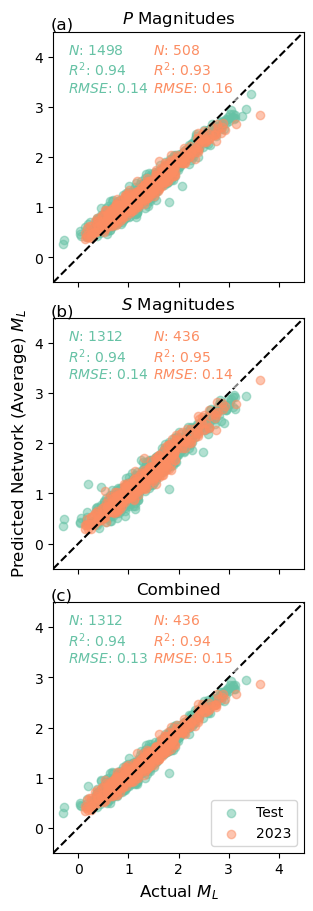

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(4, 9), constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_allfeat_avg_df, p_holdout_allfeat_avg_df],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([s_test_allfeat_avg_df, s_holdout_allfeat_avg_df],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=True,
                                    plot_ytick_labels=True,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df],
                                         ax=axes[2],
                                    title='Combined',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2023'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])
sp_labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)

### P , S, P & S network avg for events with both P and S picks (all use same subset of events) for all features

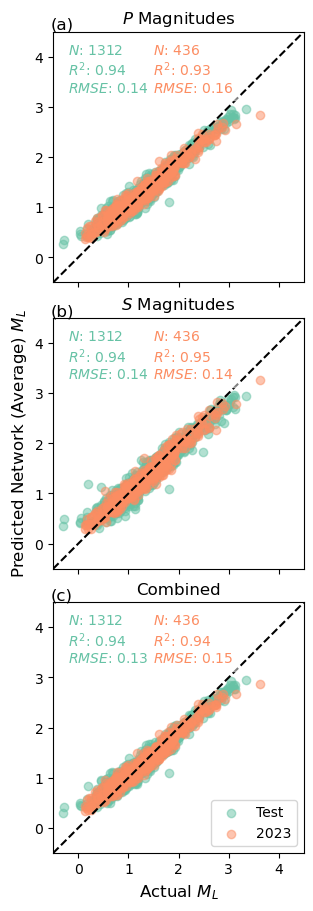

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(4, 9), constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_subset_allfeat_avg, 
                                          p_holdout_subset_allfeat_avg],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([s_test_subset_allfeat_avg, 
                                          s_holdout_subset_allfeat_avg],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=True,
                                    plot_ytick_labels=True,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df],
                                         ax=axes[2],
                                    title='Combined',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2023'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])
sp_labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    

# Put all features and selected features together in the same plot
### P (all), S (all), P & S (events with P and S picks)

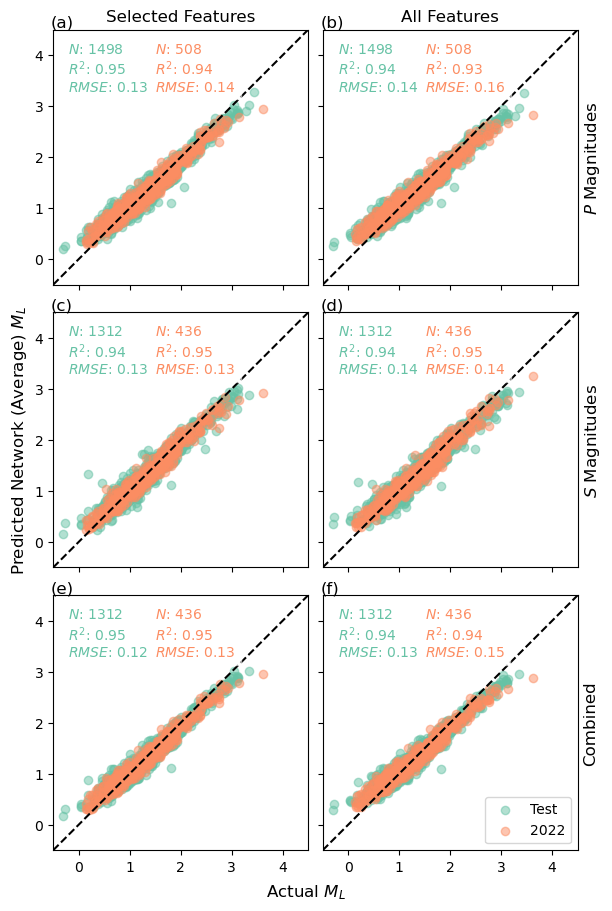

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(6, 9), constrained_layout=True)
axes = axes.flatten()

axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel('$\it P$ Magnitudes', fontsize=12)
col_labels = ['Selected Features', 'All Features']
for i, ds_list in enumerate([[p_test_avg_df, p_holdout_avg_df],
                [p_test_allfeat_avg_df, p_holdout_allfeat_avg_df]]):
    plotting.actual_v_network_avg_prediction(ds_list,
                                        ax=axes[i],
                                        title=col_labels[i],
                                        plot_lims=[-0.5, 4.5],
                                        alphas=[0.5, 0.5],
                                        legend_labels=['Test', '2022'],
                                        plot_legend=False,
                                        marker_colors=['#66c2a5', '#fc8d62'],
                                        linestyle='--',
                                        plot_ylabel=False,
                                        plot_xlabel=False,
                                        plot_ytick_labels=1-(i//1),
                                        plot_xtick_labels=False,
                                        text_x = [-0.2, 0.50],
                                        text_y=[-1.2, -1.2])

axes[3].yaxis.set_label_position("right")
axes[3].set_ylabel('$\it S$ Magnitudes', fontsize=12)
for i, ds_list in enumerate([[s_test_avg_df, s_holdout_avg_df],
                [s_test_allfeat_avg_df, s_holdout_allfeat_avg_df]]):
    plotting.actual_v_network_avg_prediction(ds_list,
                                        ax=axes[2+i],
                                        title=None,
                                        plot_lims=[-0.5, 4.5],
                                        alphas=[0.5, 0.5],
                                        legend_labels=['Test', '2022'],
                                        plot_legend=False,
                                        marker_colors=['#66c2a5', '#fc8d62'],
                                        plot_ylabel=1-(i//1),
                                        plot_ytick_labels=1-(i//1),
                                        linestyle='--',
                                        plot_xlabel=False,
                                        plot_xtick_labels=False,
                                        text_x = [-0.2, 0.50],
                                        text_y=[-1.2, -1.2])
    
axes[5].yaxis.set_label_position("right")
axes[5].set_ylabel('Combined', fontsize=12)
for i, ds_list in enumerate([[combined_test_avg_df, combined_holdout_avg_df],
                [combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df]]):
    plotting.actual_v_network_avg_prediction(ds_list,
                                            ax=axes[4+i],
                                        title=None,
                                        plot_lims=[-0.5, 4.5],
                                        alphas=[0.5, 0.5],
                                        legend_labels=['Test', '2022'],
                                        plot_legend=(i//1),
                                        marker_colors=['#66c2a5', '#fc8d62'],
                                        linestyle='--',
                                        plot_ylabel=False,
                                        plot_ytick_labels=1-(i//1),
                                        text_x = [-0.2, 0.50],
                                        text_y=[-1.2, -1.2],
                                        plot_xlabel=False)
    
fig.supxlabel('Actual $M_L$')

sp_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [18]:
avg_dict = {}
ds_names = ['P_sel', 'P_all', 'S_sel', 'S_all', 'Combined_sel', 'Combined_all']
for i, ds in enumerate([[p_test_avg_df, p_holdout_avg_df],
                [p_test_allfeat_avg_df, p_holdout_allfeat_avg_df],
                [s_test_avg_df, s_holdout_avg_df],
                [s_test_allfeat_avg_df, s_holdout_allfeat_avg_df],
                [combined_test_avg_df, combined_holdout_avg_df],
                [combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df]]):
    r2_test = r2_score(ds[0]['magnitude'], ds[0]['predicted_magnitude'])
    r2_holdout = r2_score(ds[1]['magnitude'], ds[1]['predicted_magnitude'])
    rmse_test = mean_squared_error(ds[0]['magnitude'], 
                                   ds[0]['predicted_magnitude'],
                                   squared=False)
    rmse_holdout = mean_squared_error(ds[1]['magnitude'], 
                                   ds[1]['predicted_magnitude'],
                                   squared=False)
    mae_test = mean_absolute_error(ds[0]['magnitude'], ds[0]['predicted_magnitude'])
    mae_holdout = mean_absolute_error(ds[1]['magnitude'], ds[1]['predicted_magnitude'])
    avg_dict[ds_names[i]] = {'r2_test':r2_test,
                             'r2_holdout':r2_holdout,
                             'rmse_test':rmse_test,
                             'rmse_holdout':rmse_holdout,
                             'mae_test':mae_test,
                             'mae_holdout':mae_holdout}

In [19]:
network_avg_summary_df = pd.DataFrame(avg_dict).T.reset_index().rename(columns={'index':'dataset_name'})

In [20]:
network_avg_summary_df

,dataset_name,r2_test,r2_holdout,rmse_test,rmse_holdout,mae_test,mae_holdout
0,P_sel,0.947198,0.943389,0.129119,0.141341,0.097726,0.111193
1,P_all,0.937585,0.927237,0.140381,0.160241,0.106498,0.125675
2,S_sel,0.942348,0.949886,0.133012,0.133618,0.095536,0.103238
3,S_all,0.936238,0.946356,0.139884,0.138244,0.102784,0.108788
4,Combined_sel,0.951208,0.949384,0.122367,0.134285,0.092179,0.104964
5,Combined_all,0.942153,0.935906,0.133238,0.151111,0.100460,0.118105


In [21]:
network_avg_summary_df.to_csv(os.path.join(datadir, 'network_avg_summary_results.csv'), index=False)